In [54]:
#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [55]:
df = pd.read_csv('MSFT.csv')
df = df.dropna(how='any',axis=0) 

#print the head
df.head()
print(df.count())

Date         2266
Open         2266
High         2266
Low          2266
Close        2266
Adj Close    2266
Volume       2266
dtype: int64


In [56]:
!pip install fastai==0.7.0

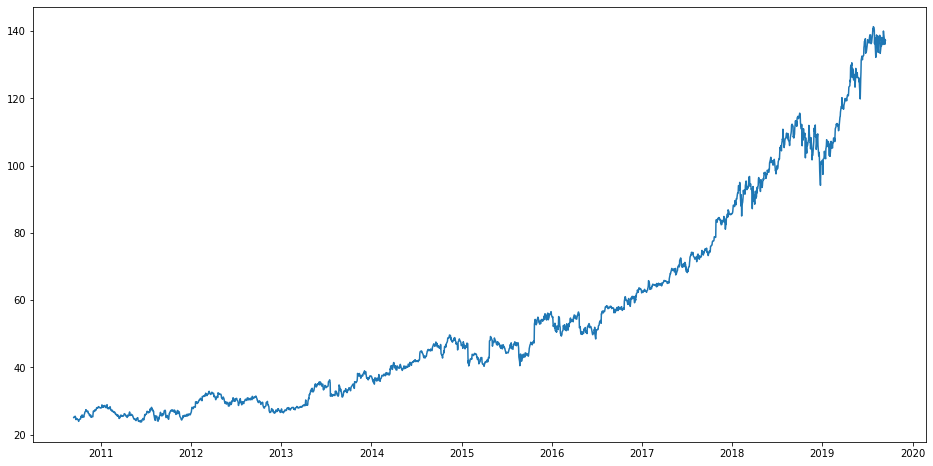

In [57]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')


In [58]:
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#sorting
data = df.sort_index(ascending=True, axis=0)

#creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

 

In [59]:
from fastai.structured import  add_datepart
add_datepart(new_data, 'Date')
new_data.drop('Elapsed', axis=1, inplace=True)  #elapsed will be the time stamp

In [60]:
new_data.head(5)

,Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start
0,25.03,2010,9,37,14,1,257,False,False,False,False,False,False
1,25.12,2010,9,37,15,2,258,False,False,False,False,False,False
2,25.33,2010,9,37,16,3,259,False,False,False,False,False,False
3,25.22,2010,9,37,17,4,260,False,False,False,False,False,False
4,25.43,2010,9,38,20,0,263,False,False,False,False,False,False


In [9]:
new_data['mon_fri'] = 0
for i in range(0,len(new_data)):
    if (new_data['Dayofweek'][i] == 0 or new_data['Dayofweek'][i] == 4):
        new_data['mon_fri'][i] = 1
    else:
        new_data['mon_fri'][i] = 0

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda/envs/azureml_py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [12]:
new_data.head(10)

,Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,mon_fri
0,25.03,2010,9,37,14,1,257,False,False,False,False,False,False,0
1,25.12,2010,9,37,15,2,258,False,False,False,False,False,False,0
2,25.33,2010,9,37,16,3,259,False,False,False,False,False,False,0
3,25.22,2010,9,37,17,4,260,False,False,False,False,False,False,1
4,25.43,2010,9,38,20,0,263,False,False,False,False,False,False,1
5,25.15,2010,9,38,21,1,264,False,False,False,False,False,False,0
6,24.61,2010,9,38,22,2,265,False,False,False,False,False,False,0
7,24.43,2010,9,38,23,3,266,False,False,False,False,False,False,0
8,24.78,2010,9,38,24,4,267,False,False,False,False,False,False,1
9,24.73,2010,9,39,27,0,270,False,False,False,False,False,False,1


In [61]:
train = new_data[:1812]
valid = new_data[1812:]

x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']

#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [62]:
preds = model.predict(x_valid)

rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
print(rms)

38.36251475279234


In [63]:
print(x_valid)

      Year  Month  Week  Day  Dayofweek  Dayofyear  Is_month_end  \
1812  2017     11    47   22          2        326         False   
1813  2017     11    47   24          4        328         False   
1814  2017     11    48   27          0        331         False   
1815  2017     11    48   28          1        332         False   
1816  2017     11    48   29          2        333         False   
1817  2017     11    48   30          3        334          True   
1818  2017     12    48    1          4        335         False   
1819  2017     12    49    4          0        338         False   
1820  2017     12    49    5          1        339         False   
1821  2017     12    49    6          2        340         False   
1822  2017     12    49    7          3        341         False   
1823  2017     12    49    8          4        342         False   
1824  2017     12    50   11          0        345         False   
1825  2017     12    50   12          1        3

In [64]:
import _pickle as cPickle
with open('linear.pkl', 'wb') as fid:
    cPickle.dump(model, fid)

In [65]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [66]:
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [67]:
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

In [68]:
dataset = new_data.values

In [69]:
train = dataset[0:1812,:]
valid = dataset[1812:,:]

In [70]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [71]:
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [72]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [73]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

In [74]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=10, verbose=2)

Epoch 1/1
 - 14s - loss: 0.0015


In [75]:
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [76]:
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

In [77]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
#print(X_test)
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [78]:
rms=np.sqrt(np.mean(np.power((valid - closing_price),2)))
print(rms)

2.906555084522825


/anaconda/envs/azureml_py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


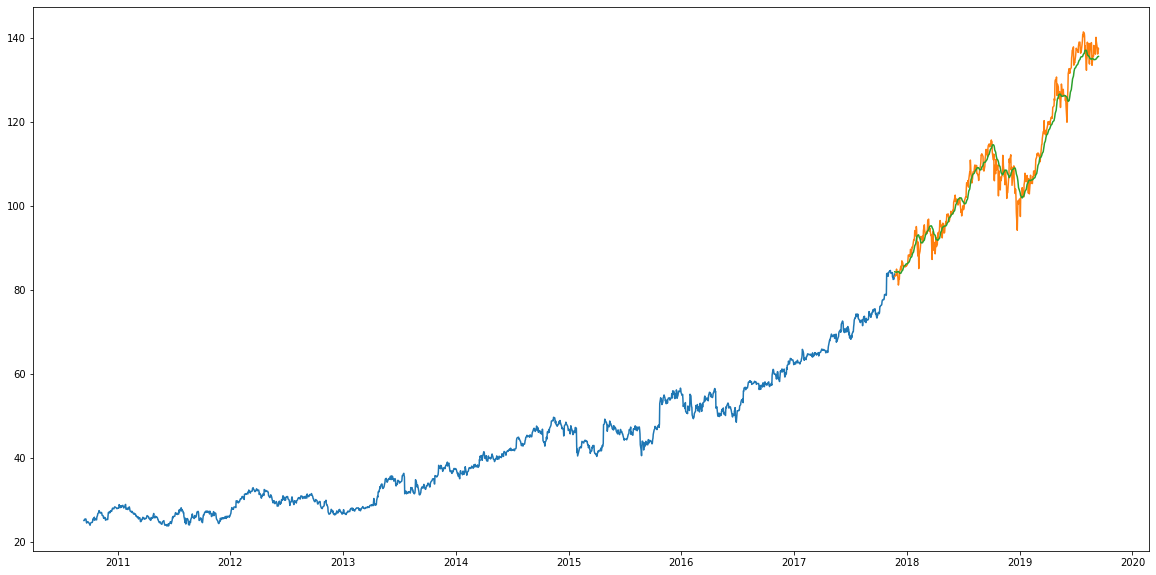

In [40]:
train = new_data[:1812]
valid = new_data[1812:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])

In [ ]:
import pickle 
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))


In [ ]:
saved_model = pickle.dumps(model) 



In [ ]:
model = pickle.loads(saved_model) 
knn_from_pickle = pickle.loads(saved_model) 
knn_from_pickle.predict(X_test) 



In [ ]:

import pickle
# save the classifier
with open('my_dumped_classifier.pkl', 'wb') as fid:
    pickle.dump(model, fid)
    
    
import _pickle as cPickle
with open('my_dumped_classifier2.pkl', 'wb') as fid:
    cPickle.dump(model, fid)

In [ ]:
model.save('model.h5')


In [ ]:
model.to_pickle('df5.pkl')


In [ ]:
from sklearn.externals import joblib
joblib.dump(model, "models12.pkl")
